In [68]:
import pandas as pd
import matplotlib as plt

Будем осуществлять работу с непростым набором данных о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

### Задание 1. Загрузка данных

Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [116]:
col = ['surgery?', 'Age', 'Hospital Number', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 'pain', 'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux', 'nasogastric reflux PH', 'rectal examination - feces', 'abdomen', 'packed cell volume', 'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 'surgical lesion?', 'type of lesion', 'a', 'b', 'cp_data']

horse_data = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv', sep=',', names=col, header=None, na_values='?', encoding='utf-8')

df_horse = horse_data[['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']]
df_horse.head(100)

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
95,1.0,1,37.3,48.0,20.0,NaN,3.0,1.0
96,2.0,1,NaN,84.0,36.0,NaN,NaN,1.0
97,1.0,1,38.1,88.0,32.0,3.0,2.0,3.0
98,2.0,1,37.7,44.0,40.0,2.0,1.0,1.0


### Задание 2. Первичное изучение данных

Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [70]:
df_horse.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [ ]:
# мода

df_horse.mode()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,38.0,48.0,20.0,3.0,3.0,1.0


In [ ]:
# медиана

df_horse.median()

surgery?                       1.0
Age                            1.0
rectal temperature            38.2
pulse                         64.0
respiratory rate              24.5
temperature of extremities     3.0
pain                           3.0
outcome                        1.0
dtype: float64

In [ ]:
# СКО

df_horse.std()

surgery?                       0.490305
Age                            2.173972
rectal temperature             0.732289
pulse                         28.630557
respiratory rate              17.642231
temperature of extremities     1.045054
pain                           1.307940
outcome                        0.737187
dtype: float64

In [ ]:
# дисперсия

df_horse.var()

surgery?                        0.240399
Age                             4.726154
rectal temperature              0.536247
pulse                         819.708775
respiratory rate              311.248328
temperature of extremities      1.092137
pain                            1.710706
outcome                         0.543445
dtype: float64

In [ ]:
"""
Выводы по показателям выше.

В основном лошадям делали операцию. Чаще всего встречаются данные о взрослых 
лошадях. Большинство лошадей имеет температуру 38 градусов. Пульс может 
достигать 48-64 ударов в минуту, частота дыхания 20-24 дыханий в минуту, а температура 
конечностей может быть прохладной. Присутствует по большей части легкая боль. 
В конечном итоге большая часть лошадей выживает.

Есть некоторые отклонения от среднего значения, например пульс и частота дыхания,
что может быть связано с интенсивной болью и высокой температурой. Для уточнения
лучше обратиться к ветеринару.
"""

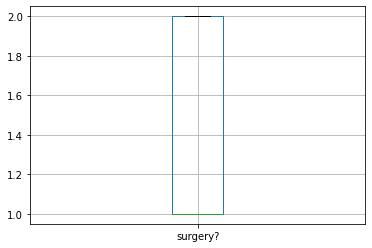

In [ ]:
# проверим наличие выбросов

df_horse.boxplot(column=['surgery?'])

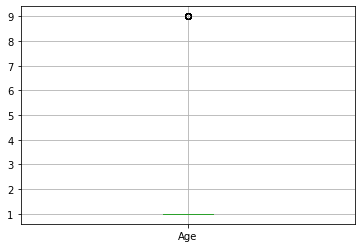

In [ ]:
df_horse.boxplot(column=['Age'])

"""
По описанию атрибут age принимает значение 1 или 2. Где 1 - это взрослая лошадь, 
2 - молодой (< 6 месяцев). Скорее всего, данный выброс обозначает ошибочное 
значение, которое может принимать 1 или 2. Возмодно, что вместо 9 должно быть
два, тем не менее лучше уточнить, если такая возможность есть. 
"""

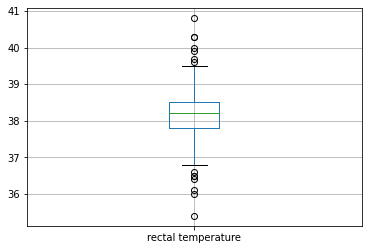

In [ ]:
df_horse.boxplot(column=['rectal temperature'])

"""
Согласно источнику: https://ohotzaimka.ru/loshadi/normalnaya-temperatura-tela-u-loshadej.html
тмпература тела лошади может достигать 41,7 градусов, которая приводит к гибели. 
При переохлаждении примерно может достигать 25 градусов. Поэтому имеющиеся 
выбросы могут говорить о том, что такие значения допустимы.
"""

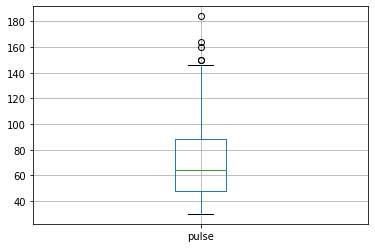

In [24]:
"""
Согласно источнику: https://ru.wikibrief.org/wiki/Circulatory_system_of_the_horse#:~:text=%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D0%B9%20%D0%BF%D1%83%D0%BB%D1%8C%D1%81%20%D1%81%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D1%8F%D0%B5%D1%82%2028%E2%80%9345%20%D1%83%D0%B4%D0%B0%D1%80%D0%BE%D0%B2,%D0%B2%20%D0%BC%D0%B8%D0%BD%D1%83%D1%82%D1%83%20%D0%BF%D1%80%D0%B8%20%D0%BC%D0%B0%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D0%BD%D0%B0%D0%B3%D1%80%D1%83%D0%B7%D0%BA%D0%B5
пульс может быть более 250 ударов в минуту у взрослой лошади при максимальной 
нагрузке. 30-40 ударов в минуту показывает норму для взрослой лошади. Поэтому имеющиеся 
выбросы могут говорить о том, что такие значения допустимы.
"""

df_horse.boxplot(column=['pulse'])


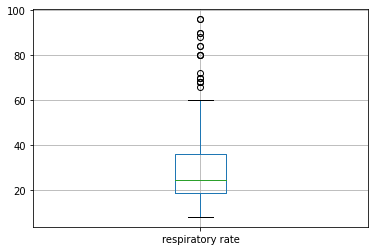

In [ ]:
df_horse.boxplot(column=['respiratory rate'])

"""
В норме частота дыхания составляет 8-10 в минуту. В галопе или рыси согласно
источнику: https://equilife.ru/the-horse/health/horse-anatomy-5/ что естественно.
Если учесть заболевание, которое влияет на дыхание, можно сказать что данные 
выбросы считаются нормой, однако, лучше уточнить у ветеринара.
"""

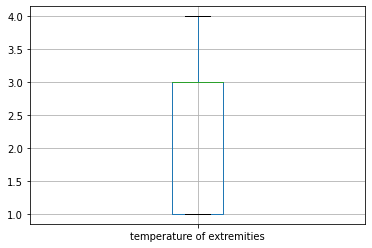

In [ ]:
df_horse.boxplot(column=['temperature of extremities'])

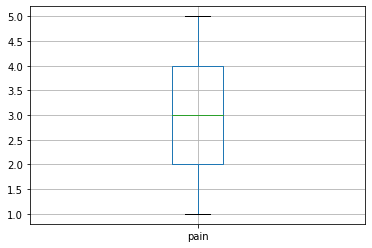

In [ ]:
df_horse.boxplot(column=['pain'])

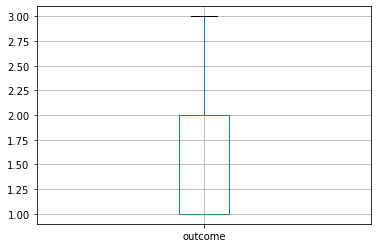

In [ ]:
df_horse.boxplot(column=['outcome'])

In [ ]:
# межквартильный размах

Q1 = df_horse.quantile(0.25)
Q3 = df_horse.quantile(0.75)
IQR = Q3 - Q1
IQR

surgery?                       1.0
Age                            0.0
rectal temperature             0.7
pulse                         40.0
respiratory rate              17.5
temperature of extremities     2.0
pain                           2.0
outcome                        1.0
dtype: float64

In [ ]:
"""
Можно использовать эти данные как для исключения имеющихся выбросов.
"""

lower_outlier = Q1 - (1.5 * IQR)
print(lower_outlier)

print('- - - - - - - ')

higher_outlier = Q3 + (1.5 * IQR)
print(higher_outlier)


surgery?                      -0.50
Age                            1.00
rectal temperature            36.75
pulse                        -12.00
respiratory rate              -7.75
temperature of extremities    -2.00
pain                          -1.00
outcome                       -0.50
dtype: float64
- - - - - - - 
surgery?                        3.50
Age                             1.00
rectal temperature             39.55
pulse                         148.00
respiratory rate               62.25
temperature of extremities      6.00
pain                            7.00
outcome                         3.50
dtype: float64


In [22]:
# проверка на ошибочные значения в категориальных атрибутах

"""
По итогу вывода результата по каждому категориальному атрибуту можно сделать
вывод, что ошибочно значения с цифрой 9 внесены только в атрибут surgery? 
"""

print(pd.unique(df_horse['surgery?'])) 
print(pd.unique(df_horse['Age']))
print(pd.unique(df_horse['temperature of extremities']))
print(pd.unique(df_horse['pain']))
print(pd.unique(df_horse['outcome']))

[ 2.  1. nan]
[1 9]
[ 3. nan  1.  4.  2.]
[ 5.  3.  2. nan  4.  1.]
[ 2.  3.  1. nan]


### Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [ ]:
df_horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    float64
 1   Age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [ ]:
# количество пропусков

pd.isna(df_horse).sum()

surgery?                       1
Age                            0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities    56
pain                          55
outcome                        1
dtype: int64

In [ ]:
(df_horse.isna().mean() * 100).round(2)

surgery?                       0.33
Age                            0.00
rectal temperature            20.00
pulse                          8.00
respiratory rate              19.33
temperature of extremities    18.67
pain                          18.33
outcome                        0.33
dtype: float64

In [151]:
"""
По заполнению пропусков. Рассмотрим тот вариант, что удалять их совсем не будем.

Так как все же от возраста зависит сама температура и в целом состояние лошади, 
то в этом случае рассмотрим разделение данных. Предположим, что возраст, где 
указано число 9, должна быть двойка, что означает молодая лошадь согласно возрасту 
будут заполняться пропуски.
Категориальные значения заполним модой, значения с выбросами средним значением,
там где отсутствуют выбросы медианой.
"""
df_horse_new = df_horse.copy()
df_horse_new

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [152]:
# заполнение пропусков модой категориальных атрибутов, в который есть пропуски

df_horse_new['surgery?'] = df_horse_new['surgery?'].fillna(df_horse['surgery?'].mode()[0])
df_horse_new['temperature of extremities'] = df_horse_new['temperature of extremities'].fillna(df_horse['temperature of extremities'].mode()[0])
df_horse_new['pain'] = df_horse_new['pain'].fillna(df_horse['pain'].mode()[0])
df_horse_new['outcome'] = df_horse_new['outcome'].fillna(df_horse['outcome'].mode()[0])

In [153]:
# заполнение средним значением там где присутствуют выбросы и пропуски

df_horse_new[['rectal temperature', 'pulse', 'respiratory rate']]= df_horse_new[['rectal temperature', 'pulse', 'respiratory rate']].fillna(df_horse[['rectal temperature', 'pulse', 'respiratory rate']].mean()).round(1)
df_horse_new

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,3.0,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,38.2,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [ ]:
"""
Атрибут Age не будем заполнять, так как пропуски отсутствуют. 
"""

In [154]:
"""
По результату видно, что пропуски после заполнения отсутствуют.
"""

pd.isna(df_horse_new).sum() # количество пропусков

surgery?                      0
Age                           0
rectal temperature            0
pulse                         0
respiratory rate              0
temperature of extremities    0
pain                          0
outcome                       0
dtype: int64

In [158]:
"""
Сравним статистические расчеты до изменения датафрейма и после.
"""

df_horse_new.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.396667,1.640000,38.174333,71.912000,30.414000,2.470000,2.960000,1.550000
std,0.490023,2.173972,0.654831,27.457472,15.838953,0.975845,1.181689,0.736642
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,37.900000,48.000000,20.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,38.200000,68.000000,30.000000,3.000000,3.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,34.250000,3.000000,4.000000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.000000,3.000000


In [159]:
# до изменения

df_horse.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [165]:
# после изменения, мода

df_horse_new.mode()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,38.2,48.0,30.4,3.0,3.0,1.0


In [166]:
# до изменения, мода

df_horse.mode()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,38.0,48.0,20.0,3.0,3.0,1.0


In [169]:
# после изменения, медиана

df_horse_new.median()

surgery?                       1.0
Age                            1.0
rectal temperature            38.2
pulse                         68.0
respiratory rate              30.0
temperature of extremities     3.0
pain                           3.0
outcome                        1.0
dtype: float64

In [170]:
# до изменения, медиана

df_horse.median()

surgery?                       1.0
Age                            1.0
rectal temperature            38.2
pulse                         64.0
respiratory rate              24.5
temperature of extremities     3.0
pain                           3.0
outcome                        1.0
dtype: float64

In [ ]:
"""
Есть некоторые отличия:
- категориальные должны подсчитываться модой, подсчет среднего в данном случае
будет некорректным.
- rectal temperature, pulse, respiratory rate - в них присутствуют выбросы, 
поэтому подсчет будет корректным с помощью среднего значения. Отличие может быть 
из-за возраста лошади, из-за ее в целом состоянии. Поэтому, если было бы известно
что должно быть вместо числа 9, то можно было бы рассмотреть данные, разделив их.
"""

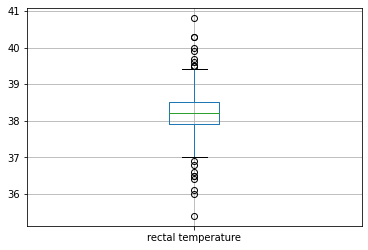

In [175]:
df_horse_new.boxplot(column=['rectal temperature'])

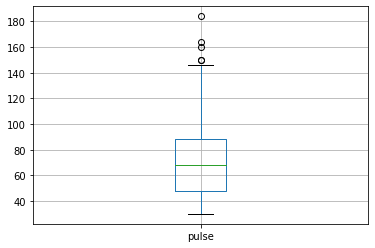

In [176]:
df_horse_new.boxplot(column=['pulse'])

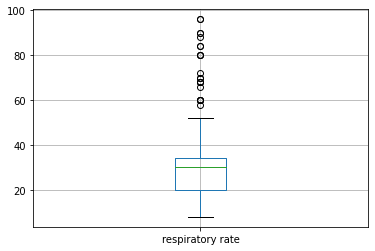

In [177]:
df_horse_new.boxplot(column=['respiratory rate'])

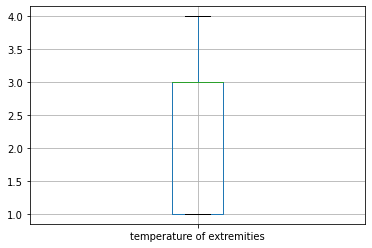

In [178]:
df_horse_new.boxplot(column=['temperature of extremities'])

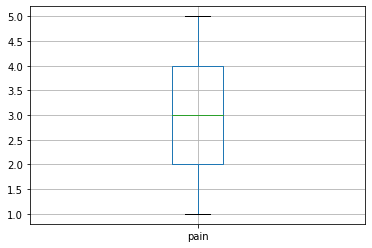

In [179]:
df_horse_new.boxplot(column=['pain'])

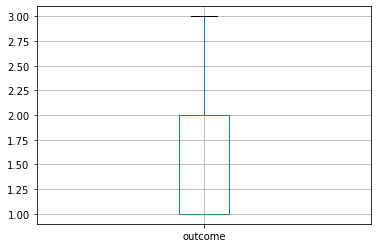

In [180]:
df_horse_new.boxplot(column=['outcome'])

In [ ]:
"""
По визуализации выше:
Никаких изменений нет по сравнению с первичным датафремом. Пристуствуют выбросы
там, где и были ранее. Все зависит от возраста, от состояния лошади.
"""

In [188]:
# межквартильный размах после внесения в пропуски значения

Q1_new = df_horse_new.quantile(0.25)
Q3_new = df_horse_new.quantile(0.75)
IQR_new = Q3 - Q1
IQR_new

surgery?                       1.0
Age                            0.0
rectal temperature             0.7
pulse                         40.0
respiratory rate              17.5
temperature of extremities     2.0
pain                           2.0
outcome                        1.0
dtype: float64

In [189]:
"""
Можно использовать эти данные как для исключения имеющихся выбросов. 
"""

lower_outlier_new = Q1_new - (1.5 * IQR_new)
print(lower_outlier_new)

print('- - - - - - - ')

higher_outlier_new = Q3_new + (1.5 * IQR_new)
print(higher_outlier_new)

surgery?                      -0.50
Age                            1.00
rectal temperature            36.85
pulse                        -12.00
respiratory rate              -6.25
temperature of extremities    -2.00
pain                          -1.00
outcome                       -0.50
dtype: float64
- - - - - - - 
surgery?                        3.50
Age                             1.00
rectal temperature             39.55
pulse                         148.00
respiratory rate               60.50
temperature of extremities      6.00
pain                            7.00
outcome                         3.50
dtype: float64


In [190]:
# межквартильный размах до заполнения пропусков

Q1 = df_horse.quantile(0.25)
Q3 = df_horse.quantile(0.75)
IQR = Q3 - Q1
IQR

surgery?                       1.0
Age                            0.0
rectal temperature             0.7
pulse                         40.0
respiratory rate              17.5
temperature of extremities     2.0
pain                           2.0
outcome                        1.0
dtype: float64

In [191]:
"""
Можно использовать эти данные как для исключения имеющихся выбросов. 
"""

lower_outlier = Q1 - (1.5 * IQR)
print(lower_outlier)

print('- - - - - - - ')

higher_outlier = Q3 + (1.5 * IQR)
print(higher_outlier)

surgery?                      -0.50
Age                            1.00
rectal temperature            36.75
pulse                        -12.00
respiratory rate              -7.75
temperature of extremities    -2.00
pain                          -1.00
outcome                       -0.50
dtype: float64
- - - - - - - 
surgery?                        3.50
Age                             1.00
rectal temperature             39.55
pulse                         148.00
respiratory rate               62.25
temperature of extremities      6.00
pain                            7.00
outcome                         3.50
dtype: float64


In [ ]:
"""
Отличия лишь по двум атрибутам  rectal temperature и respiratory rate - это может 
опять связано с возрастом лошади и ее в целом состоянии. 
"""